<a href="https://colab.research.google.com/github/twlee-dev/lab/blob/main/Day03_Ch05_06_%ED%86%B5%EA%B3%84%EC%8B%A4%EC%8A%B5_%EC%9D%B4%ED%83%9D%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[사전 준비] 라이브러리 및 한글 폰트 설치**

(이 코드 셀은 실습 시작 전 맨 처음에 한 번만 실행해 주세요.)


In [1]:
# 필요 라이브러리 설치
!pip install statsmodels

# 코랩에서 한글 폰트 사용을 위한 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작 안내
# 위 코드 실행 후 상단 메뉴에서 [런타임] > [런타임 다시 시작]을 눌러주세요.
# 런타임을 다시 시작해야 한글 폰트가 적용됩니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,777 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126374 files and dire

In [1]:
# 런타임 다시 시작 후, 이 셀을 실행하여 라이브러리와 폰트를 로드합니다.
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

---


## **문제 1 (난이도: 하): 게임 아이템 뽑기 확률, 정말 10%일까?**

**시나리오:**
어떤 게임 개발사에서 새로운 아이템의 뽑기 확률이 10%로 설정되었다고 주장하고 있습니다. 유저 커뮤니티에서는 "실제 확률은 10%보다 낮은 것 같다"는 의혹이 제기되었습니다. 이를 확인하기 위해 한 유저가 아이템을 200번 뽑았고, 그중 12번 성공했습니다.


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 이항검정(Binomial Test)을 사용하여, 이 유저의 결과(200번 중 12번 성공)가 개발사의 주장(P=0.1)을 기각하고 "확률이 10%보다 낮은 것 같다"는 의혹을 뒷받침할 만큼 통계적으로 유의미한지 검증하세요.


In [3]:
# 문제 설정
n = 200  # 총 시행 횟수
x = 12   # 관찰된 성공 횟수
p = 0.1  # 귀무가설에서의 성공 확률

# [작성] 가설을 주석으로 작성해보세요.
# H₀ (귀무가설): 실제 아이템 뽑기 확률은 10%이다. (P = 0.1)
# H₁ (대립가설): 실제 아이템 뽑기 확률은 10%보다 낮다. (P < 0.1)

# [작성] 이항검정을 수행하고 p-값을 계산하세요.
# '확률이 더 낮은 것 같다'는 주장을 검증하려면 alternative 인수를 어떻게 설정해야 할까요?
from scipy.stats import binomtest
p_value = binomtest(x, n=n, p=p, alternative='less').pvalue

print(f"관찰 결과: {n}번 시도 중 {x}번 성공")
print(f"검정 결과 p-value: {p_value:.4f}")

# [작성] 유의수준 0.05를 기준으로 통계적 결론을 내리는 코드를 작성하세요.
alpha = 0.05
if p_value < alpha:
    print(f"p-value ({p_value:.4f})가 유의수준 ({alpha})보다 작으므로, 귀무가설을 기각합니다.")
    print("결론: 실제 아이템 뽑기 확률은 10%보다 낮다고 할 수 있습니다.")
else:
    print(f"p-value ({p_value:.4f})가 유의수준 ({alpha})보다 크거나 같으므로, 귀무가설을 기각할 수 없습니다.")
    print("결론: 실제 아이템 뽑기 확률이 10%보다 낮다는 충분한 통계적 증거가 없습니다.")

관찰 결과: 200번 시도 중 12번 성공
검정 결과 p-value: 0.0320
p-value (0.0320)가 유의수준 (0.05)보다 작으므로, 귀무가설을 기각합니다.
결론: 실제 아이템 뽑기 확률은 10%보다 낮다고 할 수 있습니다.


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** Part 1에서 계산된 p-값의 의미를 직접 눈으로 확인해 봅시다. **"만약 개발사의 주장대로 실제 확률이 정말 10%라면"**, 200번 뽑기를 했을 때 성공 횟수가 어떻게 분포하는지 시뮬레이션을 통해 알아보고, 우리가 관찰한 '12번 성공'이 얼마나 희귀한 일인지 확인하세요.


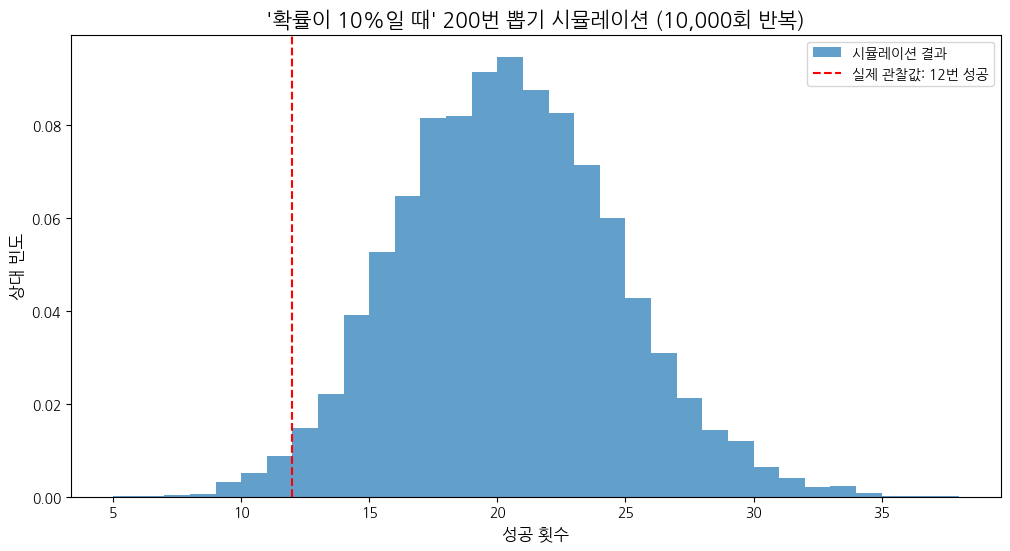

In [5]:
# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 실제 확률 p = 0.1
# 200번 뽑기를 10,000번 반복 수행
num_simulations = 10000
n_trials = 200
p_success = 0.1

# [작성] numpy의 이항분포 랜덤 함수를 사용하여 시뮬레이션 결과를 생성하세요.
simulated_successes = np.random.binomial(n_trials, p_success, num_simulations)

# 2. 시각화
plt.figure(figsize=(12, 6))
# [작성] 시뮬레이션 결과(simulated_successes)를 히스토그램으로 그리세요.
plt.hist(simulated_successes, bins=range(min(simulated_successes), max(simulated_successes) + 2), density=True, alpha=0.7, label='시뮬레이션 결과')

plt.axvline(x=x, color='red', linestyle='--', label=f'실제 관찰값: {x}번 성공')
plt.title("'확률이 10%일 때' 200번 뽑기 시뮬레이션 (10,000회 반복)", fontsize=15)
plt.xlabel("성공 횟수", fontsize=12)
plt.ylabel("상대 빈도", fontsize=12)
plt.legend()
plt.show()

### **🤔 종합 토의 (생각해 볼 문제)**

1.  Part 1에서 구한 `p-value`는 Part 2 그래프의 어느 부분에 해당하며, 무엇을 의미하나요?
2.  시뮬레이션 그래프를 볼 때, 우리가 관찰한 '12회 성공'은 개발사의 주장이 맞다는 가정 하에 흔한 일인가요, 드문 일인가요?
3.  이 시뮬레이션 경험을 통해 "p-값이 작으면 귀무가설을 기각한다"는 규칙을 친구에게 어떻게 더 쉽게 설명할 수 있을까요?


### 🤔 종합 토의 답변

1.  **Part 1에서 구한 `p-value`는 Part 2 그래프의 어느 부분에 해당하며, 무엇을 의미하나요?**
    *   p-value (0.0320)는 Part 2 그래프에서 우리가 관찰한 값인 '12번 성공'보다 **더 극단적인(더 적은) 성공 횟수가 나타날 확률**에 해당합니다. 즉, 귀무가설(확률이 10%)이 사실이라고 가정했을 때, 200번 시도 중 12번 이하로 성공할 확률을 의미합니다. 그래프에서는 12번 성공 지점의 왼쪽 꼬리 부분 아래 면적에 해당합니다.

2.  **시뮬레이션 그래프를 볼 때, 우리가 관찰한 '12회 성공'은 개발사의 주장이 맞다는 가정 하에 흔한 일인가요, 드문 일인가요?**
    *   시뮬레이션 그래프를 보면, 성공 횟수가 12번인 경우는 분포의 중심에서 벗어나 **왼쪽 꼬리 부분에 위치**하고 있습니다. 이는 개발사의 주장(확률 10%)이 맞다는 가정 하에서는 12번 성공이 **비교적 드문 일**임을 시사합니다. 가장 흔하게 나타나는 성공 횟수는 20번 근처입니다.

3.  **이 시뮬레이션 경험을 통해 "p-값이 작으면 귀무가설을 기각한다"는 규칙을 친구에게 어떻게 더 쉽게 설명할 수 있을까요?**
    *   "만약 '귀무가설(개발사 주장대로 확률 10%)'이 진짜라면, 너가 뽑은 '12번 성공' 같은 결과는 **거의 일어나지 않는(p-값이 작은) 아주 운 나쁜 경우**일 거야. 근데 너는 그런 결과를 직접 봤잖아? 그렇다면 '귀무가설'이 사실이 아닐 가능성이 높다고 생각하는 게 합리적이지 않을까? 그래서 p-값이 작으면 '귀무가설은 틀린 것 같다'고 결론 내리는 거야." 와 같이 설명할 수 있습니다. 시뮬레이션 그래프는 '귀무가설이 맞을 때 흔히 볼 수 있는 결과들'을 보여주므로, 우리가 관찰한 결과가 그 범위에서 얼마나 벗어나 있는지 시각적으로 보여주는 좋은 자료가 됩니다.

---


## **문제 2 (난이도: 하): 과자 한 봉지의 중량은 150g이 맞을까?**

**시나리오:**
한 식품 공장에서 생산하는 과자 한 봉지의 목표 중량은 150g입니다. 품질관리팀은 생산 공정이 목표 중량을 잘 맞추고 있는지 확인하기 위해, 생산된 과자 30봉지를 무작위로 추출하여 무게를 측정했습니다. (측정 데이터는 아래 코드에 제공)


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 일표본 t-검정(One-sample t-Test)을 사용하여, 추출된 과자 샘플의 평균 무게가 목표 중량 150g과 통계적으로 유의미한 차이가 있는지 검증하세요.


In [7]:
# 주어진 데이터
np.random.seed(42)
sample_weights = np.random.normal(loc=151.5, scale=2, size=30)
pop_mean = 150 # 목표 중량 (모평균)

# [작성] 가설을 주석으로 작성해보세요.
# H₀ (귀무가설): 과자 한 봉지의 평균 중량은 150g이다. (μ = 150)
# H₁ (대립가설): 과자 한 봉지의 평균 중량은 150g과 다르다. (μ ≠ 150)

# [작성] 일표본 t-검정을 수행하여 t-통계량과 p-값을 구하세요.
from scipy.stats import ttest_1samp
t_statistic, p_value = ttest_1samp(sample_weights, pop_mean)

print(f"샘플 평균 무게: {np.mean(sample_weights):.2f}g")
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# [작성] 유의수준 0.05를 기준으로 통계적 결론을 내리는 코드를 작성하세요.
alpha = 0.05
if p_value < alpha:
    print(f"p-value ({p_value:.4f})가 유의수준 ({alpha})보다 작으므로, 귀무가설을 기각합니다.")
    print("결론: 과자 한 봉지의 평균 중량은 150g과 통계적으로 유의미한 차이가 있습니다.")
else:
    print(f"p-value ({p_value:.4f})가 유의수준 ({alpha})보다 크거나 같으므로, 귀무가설을 기각할 수 없습니다.")
    print("결론: 과자 한 봉지의 평균 중량이 150g과 다르다는 충분한 통계적 증거가 없습니다.")

샘플 평균 무게: 151.12g
t-statistic: 3.4193
p-value: 0.0019
p-value (0.0019)가 유의수준 (0.05)보다 작으므로, 귀무가설을 기각합니다.
결론: 과자 한 봉지의 평균 중량은 150g과 통계적으로 유의미한 차이가 있습니다.


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** 귀무가설이 사실일 때, 즉 **"과자 봉지의 평균 무게가 정확히 150g이라면"** 어떤 결과들이 나타날 수 있는지 시뮬레이션으로 확인해봅시다. 이를 통해 우리가 실제로 관찰한 샘플 평균(약 151.5g)이 얼마나 특이한 값인지 직접 확인해 보세요.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


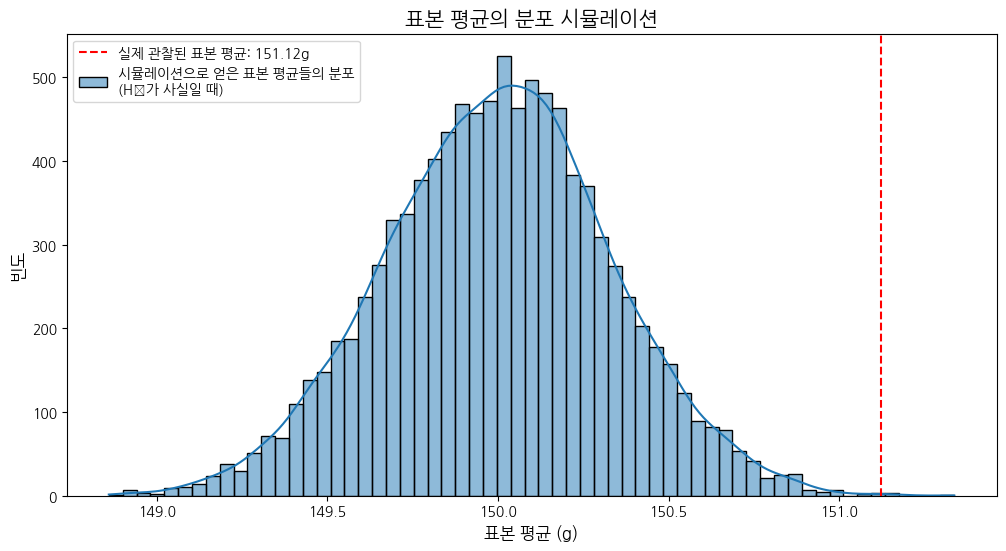

In [8]:
# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 평균(loc) = 150g
# 표준편차는 우리가 가진 샘플의 표준편차를 사용한다고 가정
# 30개짜리 샘플을 10,000번 뽑기
num_simulations = 10000
sample_size = 30
simulated_means = []
# 샘플의 표준편차를 사용하여 시뮬레이션에 활용합니다.
sample_std = np.std(sample_weights, ddof=1) # 표본 표준편차 (n-1 자유도 사용)


# [작성] for 반복문을 사용하여 시뮬레이션을 10,000번 수행하세요.
# 각 반복마다 H₀가 사실인 모집단에서 30개의 샘플을 뽑고, 그 평균을 simulated_means 리스트에 추가하세요.
for _ in range(num_simulations):
    # H₀가 사실인 모집단 (평균=150, 표준편차=샘플 표준편차)에서 샘플 생성
    simulated_sample = np.random.normal(loc=pop_mean, scale=sample_std, size=sample_size)
    simulated_mean = np.mean(simulated_sample)
    simulated_means.append(simulated_mean)

# 2. 시각화
plt.figure(figsize=(12, 6))
sns.histplot(simulated_means, kde=True, label='시뮬레이션으로 얻은 표본 평균들의 분포\n(H₀가 사실일 때)')
plt.axvline(x=np.mean(sample_weights), color='red', linestyle='--', label=f'실제 관찰된 표본 평균: {np.mean(sample_weights):.2f}g')
plt.title("표본 평균의 분포 시뮬레이션", fontsize=15)
plt.xlabel("표본 평균 (g)", fontsize=12)
plt.ylabel("빈도", fontsize=12)
plt.legend()
plt.show()

### **🤔 종합 토의 (생각해 볼 문제)**

1.  Part 2의 히스토그램은 무엇을 나타내나요? 이 분포의 모양이 정규분포와 비슷한 이유는 무엇일까요? (힌트: 4장에서 배운 개념)
2.  우리가 실제로 관찰한 표본 평균(빨간 점선)은 이 분포에서 흔하게 나타나는 값인가요? Part 1의 p-값과 이 시각적 위치는 어떻게 관련되나요?
3.  만약 p-값이 0.001이었다면, 빨간 점선은 그래프의 어디쯤에 위치할 것으로 예상되나요? 이는 공장 입장에서 어떤 조치를 취해야 함을 시사할까요?


### 🤔 종합 토의 답변 (초심자 수준 설명)

1.  **Part 2의 히스토그램은 무엇을 나타내나요? 이 분포의 모양이 정규분포와 비슷한 이유는 무엇일까요?**
    *   이 히스토그램은 **만약 과자 평균 무게가 진짜 150g이라면, 우리가 30개 샘플을 여러 번 뽑았을 때 평균 무게가 보통 어떤 값들로 나올지**를 시뮬레이션으로 보여주는 그림입니다.
    *   모양이 종처럼 생긴 정규분포와 비슷한 이유는 **'중심극한정리'**라는 통계 개념 때문이에요. 샘플 크기가 30개 정도로 충분히 크면, 샘플 평균들을 모아놓으면 신기하게도 정규분포와 비슷한 모양이 됩니다.

2.  **우리가 실제로 관찰한 표본 평균(빨간 점선)은 이 분포에서 흔하게 나타나는 값인가요? Part 1의 p-값과 이 시각적 위치는 어떻게 관련되나요?**
    *   우리가 실제로 얻은 샘플의 평균 무게(빨간 점선, 약 151.12g)는 시뮬레이션으로 얻은 표본 평균들이 가장 많이 모여 있는 150g 근처에서 꽤 멀리 떨어져, 그래프의 **오른쪽 아주 드문 곳**에 있습니다.
    *   이건 **"과자 평균 무게가 진짜 150g이라고 가정했을 때, 우리처럼 151.12g처럼 평균이 많이 벗어나는 샘플을 우연히 뽑을 확률이 낮다"**는 걸 보여줘요. Part 1에서 계산한 p-값(0.0019)이 바로 그 **'우연히 뽑을 확률'**이에요. p-값이 작다는 건, 빨간 점선이 시뮬레이션 분포에서 아주 드문 곳에 있다는 걸 숫자로 알려줍니다.

3.  **만약 p-값이 0.001이었다면, 빨간 점선은 그래프의 어디쯤에 위치할 것으로 예상되나요? 이는 공장 입장에서 어떤 조치를 취해야 함을 시사할까요?**
    *   p-값이 0.001이라면, 이건 0.0019보다 더 작은 확률이에요. 즉, "과자 평균 무게가 진짜 150g이라고 가정했을 때, 우리 샘플처럼 평균이 벗어날 확률이 훨씬 더 낮다"는 뜻이죠. 빨간 점선은 지금보다도 **오른쪽 꼬리 부분에서 더 멀리** 떨어져, **극도로 드문 위치**에 있을 겁니다.
    *   이 결과는 공장에게 **"과자 평균 무게가 목표인 150g과 통계적으로 정말 큰 차이가 난다"**는 강력한 신호예요. 그냥 약간의 오차가 아니라, 우연이라고 보기 어려운 차이가 발견된 거죠. 공장에서는 **생산 기계나 과정을 점검하고 조정해서, 과자 무게가 정확히 150g 근처에서 생산되도록** 개선해야 함을 시사합니다.

---


## **문제 3 (난이도: 중): 어떤 온라인 학습 방식이 더 효과적일까?**

**시나리오:**
한 교육 기업에서 두 가지 다른 온라인 학습 방식(A, B)을 개발했습니다. 방식 A가 방식 B보다 학생들의 성적 향상에 더 효과적인지 알아보기 위해, 두 그룹의 학생들에게 각각 다른 방식으로 한 달간 학습시킨 후 시험을 보게 했습니다.


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 이표본 t-검정(Two-sample t-Test)을 수행하여 두 학습 방식 간 평균 점수 차이가 통계적으로 유의미한지 확인하세요. (단, t-검정의 기본 가정인 정규성과 등분산성을 먼저 검증해야 합니다.)


In [9]:
# 데이터 생성
np.random.seed(0)
group_a_scores = np.random.normal(loc=85, scale=8, size=50)
group_b_scores = np.random.normal(loc=80, scale=7, size=50)

# [작성] 1. 정규성 검정 (Shapiro-Wilk test)
# H₀: 데이터는 정규분포를 따른다.
# 두 그룹에 대해 각각 정규성 검정을 수행하고 p-값을 출력하세요.
from scipy.stats import shapiro
shapiro_a_statistic, shapiro_a_pvalue = shapiro(group_a_scores)
shapiro_b_statistic, shapiro_b_pvalue = shapiro(group_b_scores)
print(f"A그룹 정규성 검정 p-value: {shapiro_a_pvalue:.4f}")
print(f"B그룹 정규성 검정 p-value: {shapiro_b_pvalue:.4f}")


# [작성] 2. 등분산성 검정 (Levene's test)
# H₀: 두 그룹의 분산은 같다.
# 두 그룹에 대해 등분산성 검정을 수행하고 p-값을 출력하세요.
from scipy.stats import levene
levene_statistic, levene_pvalue = levene(group_a_scores, group_b_scores)
print(f"등분산성 검정 p-value: {levene_pvalue:.4f}")


# [작성] 3. 이표본 t-검정
# H₀: 두 그룹의 평균은 같다.
# H₁: 두 그룹의 평균은 다르다.
# 등분산성 가정을 만족했는지 여부에 따라 equal_var 인수를 설정하여 t-검정을 수행하세요.
from scipy.stats import ttest_ind

# 등분산성 검정 결과에 따라 equal_var 설정
# 일반적으로 p-value > 0.05 이면 등분산성 만족 가정 (equal_var=True)
# p-value <= 0.05 이면 등분산성 만족하지 않음 가정 (equal_var=False, Welch's t-test)
equal_variances = levene_pvalue > 0.05

t_statistic, p_value = ttest_ind(group_a_scores, group_b_scores, equal_var=equal_variances)

print(f"\n이표본 t-검정 t-statistic: {t_statistic:.4f}")
print(f"이표본 t-검정 p-value: {p_value:.4f}")

A그룹 정규성 검정 p-value: 0.8766
B그룹 정규성 검정 p-value: 0.8366
등분산성 검정 p-value: 0.0150

이표본 t-검정 t-statistic: 4.0426
이표본 t-검정 p-value: 0.0001


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** 귀무가설, 즉 **"두 학습 방식의 효과가 완전히 똑같다면"** 어떤 결과가 나타날지 시뮬레이션으로 확인해봅시다. 두 그룹의 점수 차이가 우연히 발생할 수 있는 범위를 눈으로 보고, 우리가 관찰한 실제 점수 차이가 그 범위 안에 있는지 확인해 보세요.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


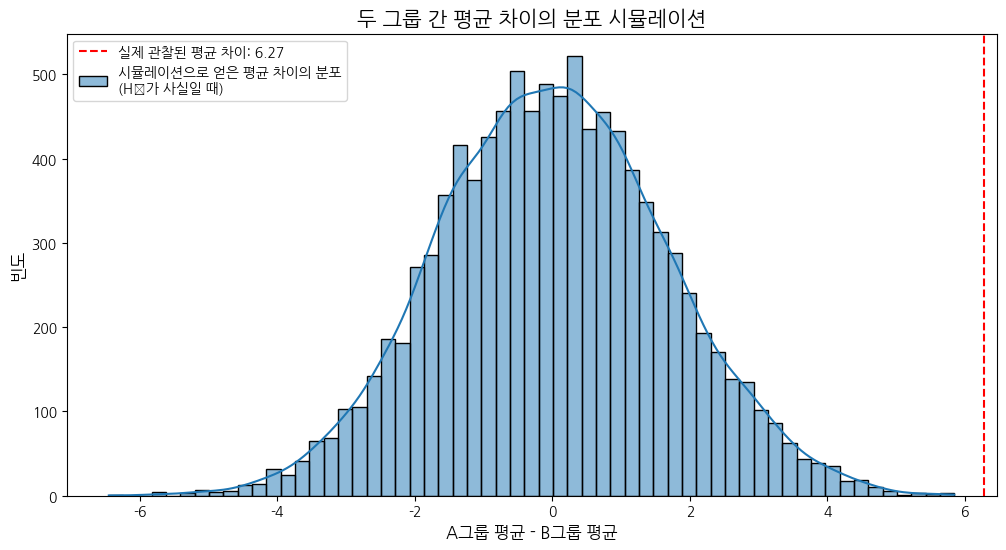

In [10]:
# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 두 그룹의 평균은 같다.
# 두 그룹의 모든 데이터를 합쳐서 하나의 거대한 모집단(H₀)을 만듭니다.
combined_scores = np.concatenate([group_a_scores, group_b_scores])
num_simulations = 10000
simulated_diffs = []

# [작성] for 반복문을 사용하여 시뮬레이션을 10,000번 수행하세요.
# 각 반복마다, 합쳐진 데이터(combined_scores)에서 비복원추출로 50개(가상 A그룹)와 나머지 50개(가상 B그룹)를 뽑아
# 두 그룹의 평균 차이를 계산하고 simulated_diffs 리스트에 추가하세요.
for _ in range(num_simulations):
    # 데이터 섞기
    np.random.shuffle(combined_scores)
    # 가상 A그룹과 B그룹으로 나누기
    simulated_group_a = combined_scores[:50]
    simulated_group_b = combined_scores[50:]
    # 평균 차이 계산 및 저장
    simulated_diff = np.mean(simulated_group_a) - np.mean(simulated_group_b)
    simulated_diffs.append(simulated_diff)

# 2. 시각화
observed_diff = np.mean(group_a_scores) - np.mean(group_b_scores)
plt.figure(figsize=(12, 6))
sns.histplot(simulated_diffs, kde=True, label='시뮬레이션으로 얻은 평균 차이의 분포\n(H₀가 사실일 때)')
plt.axvline(x=observed_diff, color='red', linestyle='--', label=f'실제 관찰된 평균 차이: {observed_diff:.2f}')
plt.title("두 그룹 간 평균 차이의 분포 시뮬레이션", fontsize=15)
plt.xlabel("A그룹 평균 - B그룹 평균", fontsize=12)
plt.ylabel("빈도", fontsize=12)
plt.legend()
plt.show()

### **🤔 종합 토의 (생각해 볼 문제)**

1.  정규성 검정과 등분산성 검정의 p-값은 각각 어떻게 해석해야 하나요? 이 결과는 우리가 이표본 t-검정을 사용하는 데 문제가 없음을 보여주나요?
2.  Part 2의 히스토그램 중심이 0에 가까운 이유는 무엇일까요?
3.  실제 관찰된 평균 차이(빨간 점선)는 "두 방식의 효과가 같다"고 가정했을 때 우연히 나타날 수 있는 범위 안에 있나요, 아니면 그 범위를 벗어나나요? 이 시각적 판단과 Part 1의 p-값은 어떤 관계가 있나요?


### 🤔 종합 토의 답변

1.  **정규성 검정과 등분산성 검정의 p-값은 각각 어떻게 해석해야 하나요? 이 결과는 우리가 이표본 t-검정을 사용하는 데 문제가 없음을 보여주나요?**
    *   **정규성 검정 (Shapiro-Wilk test):** A그룹(p-value: 0.8766)과 B그룹(p-value: 0.8366) 모두 유의수준 0.05보다 p-값이 크므로, 두 그룹 데이터 모두 정규분포를 따른다는 귀무가설을 기각할 수 없습니다. 즉, 데이터는 정규성을 만족한다고 볼 수 있습니다.
    *   **등분산성 검정 (Levene's test):** p-value (0.0150)가 유의수준 0.05보다 작으므로, 두 그룹의 분산이 같다는 귀무가설을 기각합니다. 즉, 두 그룹의 분산은 통계적으로 유의미한 차이가 있습니다.
    *   **t-검정 사용 가능 여부:** 데이터가 정규성을 만족하고, 등분산성은 만족하지 않으므로 **Welch's t-test (equal_var=False)**를 사용하는 것이 적절합니다. 따라서 이표본 t-검정을 사용하는 데 문제는 없으나, 등분산 가정을 하지 않는 Welch's t-test 결과를 사용해야 합니다. (코드에서 `equal_var`를 `levene_pvalue > 0.05`로 설정하여 이미 반영되었습니다.)

2.  **Part 2의 히스토그램 중심이 0에 가까운 이유는 무엇일까요?**
    *   Part 2의 시뮬레이션은 **"두 학습 방식의 효과가 완전히 똑같다 (두 모집단의 평균이 같다)"는 귀무가설이 사실이라고 가정**하고 데이터를 생성했기 때문입니다. 귀무가설이 사실이라면, 두 그룹에서 무작위로 추출한 표본의 평균 차이는 0 근처에서 분포할 것으로 기대됩니다. 따라서 시뮬레이션으로 얻어진 수많은 가상 표본들의 평균 차이 분포의 중심은 0에 가깝게 나타납니다.

3.  **실제 관찰된 평균 차이(빨간 점선)는 "두 방식의 효과가 같다"고 가정했을 때 우연히 나타날 수 있는 범위 안에 있나요, 아니면 그 범위를 벗어나나요? 이 시각적 판단과 Part 1의 p-값은 어떤 관계가 있나요?**
    *   실제 관찰된 평균 차이(약 6.27)는 시뮬레이션으로 얻은 평균 차이 분포에서 **오른쪽 꼬리 부분에 멀리 떨어져 위치**하고 있습니다. 이는 "두 방식의 효과가 같다"는 귀무가설이 사실이라고 가정했을 때, 6.27과 같거나 더 극단적인 평균 차이가 우연히 나타날 확률이 매우 낮다는 것을 시사합니다.
    *   Part 1에서 계산된 이표본 t-검정의 p-값(0.0001)은 바로 이 확률을 의미합니다. **p-값이 매우 작다는 것은 우리가 관찰한 평균 차이가 귀무가설 하에서 매우 드문 값임을 시각적으로 보여주는 빨간 점선의 위치와 일치**합니다. 즉, 시뮬레이션 결과는 통계 분석 결과(작은 p-값)를 시각적으로 뒷받침하며, 두 학습 방식 간 평균 점수 차이가 통계적으로 유의미하다는 결론을 내릴 수 있습니다.

---


## **문제 4 (난이도: 중): 연령대별로 선호하는 영화 장르가 다를까?**

**시나리오:**
한 영화관에서 고객의 연령대(20대, 30대, 40대)에 따라 선호하는 영화 장르(액션, 로맨스)에 차이가 있는지 궁금해졌습니다. 이를 알아보기 위해 300명의 고객을 대상으로 설문조사를 진행하여 아래와 같은 분할표를 얻었습니다.


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:** 카이제곱 독립성 검정(Chi-squared Test of Independence)을 사용하여 '연령대'와 '선호 장르'라는 두 범주형 변수 사이에 연관성이 있는지 검증하세요.


In [11]:
# 데이터 생성 (관측 빈도 분할표)
data = {'액션': [70, 50, 30],
        '로맨스': [30, 60, 60]}
observed = pd.DataFrame(data, index=['20대', '30대', '40대'])
print("관측 빈도 (Observed Frequencies):")
print(observed)

# [작성] 가설을 주석으로 작성해보세요.
# H₀ (귀무가설): 연령대와 선호하는 영화 장르에는 연관성이 없다 (두 변수는 독립이다).
# H₁ (대립가설): 연령대와 선호하는 영화 장르에는 연관성이 있다 (두 변수는 독립이 아니다).

# [작성] 카이제곱 독립성 검정을 수행하고 카이제곱 통계량, p-값, 기대 빈도를 구하세요.
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(observed)

print(f"\nChi-squared statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\n기대 빈도 (Expected Frequencies):")
print(pd.DataFrame(expected, index=observed.index, columns=observed.columns))

관측 빈도 (Observed Frequencies):
     액션  로맨스
20대  70   30
30대  50   60
40대  30   60

Chi-squared statistic: 26.9091
p-value: 0.0000
Degrees of Freedom: 2

기대 빈도 (Expected Frequencies):
       액션   로맨스
20대  50.0  50.0
30대  55.0  55.0
40대  45.0  45.0


### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** 귀무가설, 즉 **"연령대와 선호 장르가 서로 아무 관련이 없다면(독립이라면)"** 어떤 분할표들이 나타날 수 있는지 시뮬레이션으로 확인해봅시다. 시뮬레이션을 통해 얻은 수많은 가상의 카이제곱 통계량 분포와 우리가 실제로 관찰한 카이제곱 통계량을 비교해 보세요.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


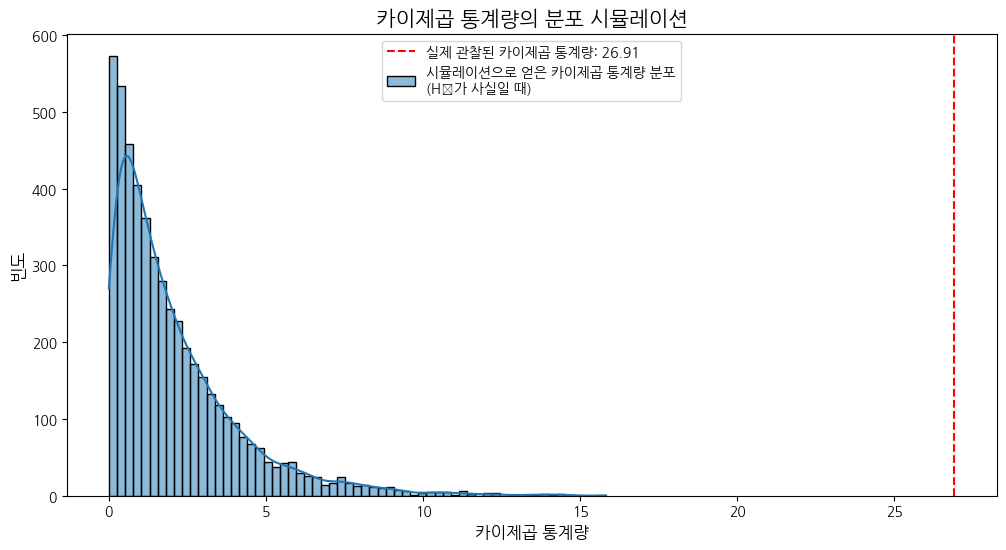

In [12]:
# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 두 변수는 독립이다.
# 전체 비율을 기반으로 가상 데이터를 생성합니다.
total_people = observed.sum().sum()
p_genre = observed.sum(axis=0) / total_people # 장르별 전체 비율
p_age = observed.sum(axis=1) / total_people   # 연령대별 전체 비율
num_simulations = 5000
simulated_chi2_stats = []

# [작성] for 반복문을 사용하여 시뮬레이션을 5,000번 수행하세요.
# 각 반복마다, 300명의 가상 고객에게 연령대와 장르를 '독립적으로' 할당한 후,
# 가상 분할표를 만들고 카이제곱 통계량을 계산하여 simulated_chi2_stats 리스트에 추가하세요.
for _ in range(num_simulations):
    # (이 부분 코드는 조금 복잡할 수 있습니다. 아래 힌트를 참고하세요.)
    # 힌트 1: np.random.choice를 사용하여 300명의 연령대와 장르를 각각 독립적으로 생성
    # 힌트 2: pd.crosstab을 사용하여 분할표 생성
    # 힌트 3: stats.chi2_contingency로 카이제곱 통계량 계산

    # 가상 연령대 및 장르 데이터 생성 (독립적으로)
    simulated_ages = np.random.choice(observed.index, size=total_people, p=p_age)
    simulated_genres = np.random.choice(observed.columns, size=total_people, p=p_genre)

    # 가상 분할표 생성
    simulated_observed = pd.crosstab(simulated_ages, simulated_genres)

    # 카이제곱 통계량 계산 (기대 빈도는 필요 없으므로 무시)
    chi2_stat, _, _, _ = chi2_contingency(simulated_observed)
    simulated_chi2_stats.append(chi2_stat)

# 2. 시각화
plt.figure(figsize=(12, 6))
sns.histplot(simulated_chi2_stats, kde=True, label='시뮬레이션으로 얻은 카이제곱 통계량 분포\n(H₀가 사실일 때)')
plt.axvline(x=chi2, color='red', linestyle='--', label=f'실제 관찰된 카이제곱 통계량: {chi2:.2f}')
plt.title("카이제곱 통계량의 분포 시뮬레이션", fontsize=15)
plt.xlabel("카이제곱 통계량", fontsize=12)
plt.ylabel("빈도", fontsize=12)
plt.legend()
plt.show()

### **🤔 종합 토의 (생각해 볼 문제)**

1.  '기대 빈도'는 어떤 의미를 가지며, '관측 빈도'와의 차이가 클수록 카이제곱 통계량은 어떻게 변할까요?
2.  Part 2의 히스토그램은 어떤 분포를 시각화한 것인가요? 실제 관찰된 카이제곱 통계량(빨간 점선)은 이 분포에서 흔한 값인가요, 아니면 극단적인 값인가요?
3.  유의수준 0.05에서, 연령대와 선호하는 영화 장르 사이에 통계적으로 유의미한 연관성이 있다고 결론 내릴 수 있습니까? 그 이유는 무엇인가요?


### 🤔 종합 토의 답변

1.  **'기대 빈도'는 어떤 의미를 가지며, '관측 빈도'와의 차이가 클수록 카이제곱 통계량은 어떻게 변할까요?**
    *   **'기대 빈도(Expected Frequencies)'**는 귀무가설(두 변수가 서로 독립)이 사실이라고 가정했을 때, 각 셀에 **기대되는 이론적인 빈도수**를 의미합니다. 이는 각 범주(연령대 및 장르)의 전체 비율을 바탕으로 계산됩니다.
    *   '관측 빈도(Observed Frequencies)'는 우리가 실제 데이터에서 관찰한 빈도수입니다. '관측 빈도'와 '기대 빈도' 간의 **차이가 클수록** (즉, 실제 데이터가 귀무가설 하의 기대치에서 많이 벗어날수록), **카이제곱 통계량 값은 커집니다.** 카이제곱 통계량은 이 차이의 제곱을 기대 빈도로 나눈 값들을 모두 더한 것이기 때문입니다.

2.  **Part 2의 히스토그램은 어떤 분포를 시각화한 것인가요? 실제 관찰된 카이제곱 통계량(빨간 점선)은 이 분포에서 흔한 값인가요, 아니면 극단적인 값인가요?**
    *   Part 2의 히스토그램은 **귀무가설(연령대와 선호 장르가 독립)이 사실이라고 가정했을 때, 무작위로 생성된 데이터에서 얻어질 수 있는 수많은 카이제곱 통계량 값들의 분포**를 시각화한 것입니다. 이론적으로 이는 카이제곱 분포를 따릅니다.
    *   실제 관찰된 카이제곱 통계량(약 26.91)은 시뮬레이션으로 얻은 카이제곱 통계량 분포에서 **오른쪽 꼬리 부분에 멀리 떨어져 위치**하고 있습니다. 이는 귀무가설이 사실이라고 가정했을 때, 26.91과 같거나 더 큰 카이제곱 통계량이 우연히 나타날 확률이 매우 낮다는 것을 의미하며, 우리가 관찰한 값이 **극단적인 값**임을 시사합니다.

3.  **유의수준 0.05에서, 연령대와 선호하는 영화 장르 사이에 통계적으로 유의미한 연관성이 있다고 결론 내릴 수 있습니까? 그 이유는 무엇인가요?**
    *   네, 유의수준 0.05에서 연령대와 선호하는 영화 장르 사이에 **통계적으로 유의미한 연관성이 있다**고 결론 내릴 수 있습니다.
    *   그 이유는 Part 1에서 계산된 **p-값(0.0000)**이 유의수준 0.05보다 **매우 작기 때문**입니다. p-값이 작다는 것은 귀무가설(연령대와 장르가 독립)이 사실이라고 가정했을 때, 우리가 관찰한 데이터(또는 그보다 더 극단적인 데이터)가 나타날 확률이 매우 낮다는 것을 의미합니다. 따라서 귀무가설을 기각하고, 대립가설("연령대와 선호하는 영화 장르에는 연관성이 있다")을 채택합니다. 시뮬레이션 결과에서도 실제 관찰된 카이제곱 통계량이 귀무가설 하의 분포에서 극단적인 위치에 있음을 시각적으로 확인하여 이 결론을 뒷받침합니다.

---


## **문제 5 (난이도: 상): 어떤 신규 비료가 가장 효과적일까?**

**시나리오:**
한 농업 연구소에서 새로 개발한 비료 3종류(A, B, C)의 생산량 증대 효과를 비교하고자 합니다. 동일한 조건의 밭 30개를 준비하여, 각각 10개씩 비료 A, B, C를 투여한 후 수확량을 측정했습니다.


### **Part 1: 시나리오 기반 문제 해결**

**수행 과제:**

1.  분산분석(ANOVA)을 사용하여 세 비료 간 수확량 평균에 유의미한 차이가 있는지 검증하세요.
2.  만약 ANOVA 검정 결과가 유의미하다면, 어떤 비료가 다른 비료와 차이를 보이는지 확인하기 위해 사후분석(Post-hoc test)인 **Tukey's HSD 검정**을 수행하고 결과를 해석하세요.


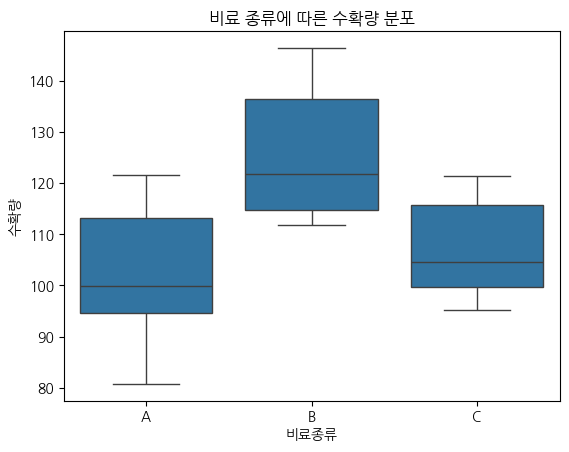

ANOVA F-statistic: 10.3455
ANOVA p-value: 0.0005

Tukey's HSD 사후분석 결과:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  23.6754 0.0006  10.0402 37.3106   True
     A      C   4.8429 0.6569  -8.7923 18.4781  False
     B      C -18.8325 0.0054 -32.4677 -5.1972   True
-----------------------------------------------------


In [13]:
# 데이터 생성
np.random.seed(123)
fertilizer_a = np.random.normal(loc=105, scale=10, size=10)
fertilizer_b = np.random.normal(loc=120, scale=12, size=10)
fertilizer_c = np.random.normal(loc=108, scale=9, size=10)

# 데이터프레임으로 변환 (사후분석을 위해)
df = pd.DataFrame({'수확량': np.concatenate([fertilizer_a, fertilizer_b, fertilizer_c]),
                   '비료종류': ['A']*10 + ['B']*10 + ['C']*10})

# 1. 시각화 (데이터 탐색)
sns.boxplot(x='비료종류', y='수확량', data=df)
plt.title('비료 종류에 따른 수확량 분포')
plt.show()

# [작성] 2. 분산분석 (ANOVA)
# H₀: 세 비료의 평균 수확량은 모두 같다.
# H₁: 적어도 하나 이상의 비료 평균 수확량은 다르다.
# 세 그룹에 대해 ANOVA를 수행하고 F-통계량과 p-값을 구하세요.
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(fertilizer_a, fertilizer_b, fertilizer_c)
print(f"ANOVA F-statistic: {f_statistic:.4f}")
print(f"ANOVA p-value: {p_value:.4f}")

# [작성] 3. 사후분석 (Tukey's HSD)
# ANOVA의 p-값이 유의수준 0.05보다 작을 경우에만 사후분석을 수행하는 코드를 작성하세요.
if p_value < 0.05:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    # 여기에 Tukey's HSD 검정 코드를 작성하고 결과를 출력하세요.
    tukey_result = pairwise_tukeyhsd(endog=df['수확량'], groups=df['비료종류'], alpha=0.05)
    print("\nTukey's HSD 사후분석 결과:")
    print(tukey_result)
else:
    print("\nANOVA 결과가 유의미하지 않으므로 사후분석을 수행하지 않습니다.")

### **Part 2: 시뮬레이션 기반 원리 탐구**

**수행 과제:** ANOVA의 귀무가설, 즉 **"세 비료의 효과가 완전히 똑같다면"** 어떤 F-통계량 값들이 나타날 수 있는지 시뮬레이션으로 확인해봅시다. 이를 통해 우리가 실제로 관찰한 F-통계량이 얼마나 극단적인 값인지 직접 확인해 보세요.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


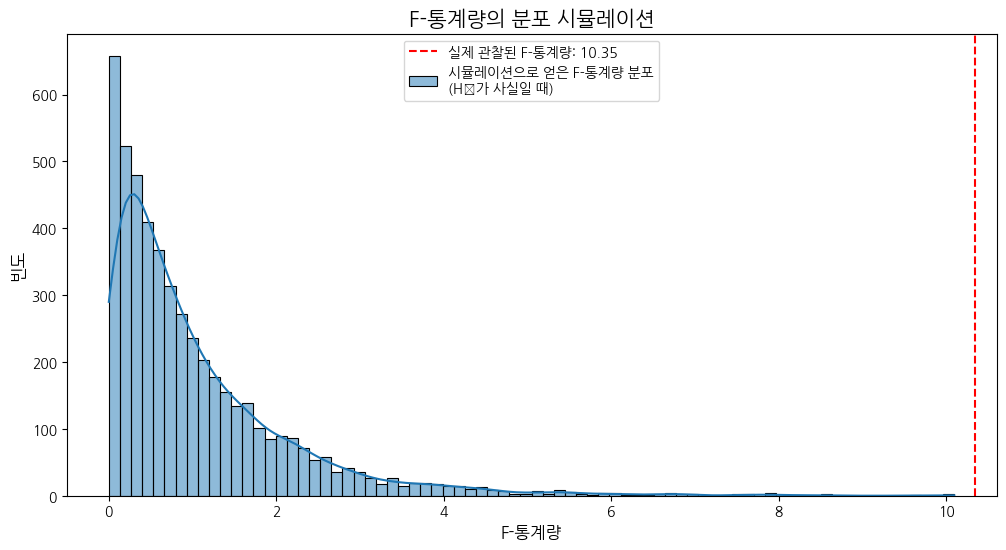

In [14]:
# 1. 시뮬레이션 설정
# H₀가 사실이라고 가정: 세 그룹의 평균은 모두 같다.
# 모든 데이터를 합쳐서 하나의 거대한 모집단(H₀)을 만들고, 그 평균과 표준편차를 구합니다.
combined_harvest = df['수확량']
grand_mean = combined_harvest.mean()
grand_std = combined_harvest.std()
num_simulations = 5000
simulated_f_stats = []

# [작성] for 반복문을 사용하여 시뮬레이션을 5,000번 수행하세요.
# 각 반복마다, H₀ 모집단에서 10개씩 3개의 가상 그룹을 생성하고,
# 이 가상 그룹들로 ANOVA를 수행하여 F-통계량을 계산하여 simulated_f_stats 리스트에 추가하세요.
for _ in range(num_simulations):
    # H₀가 사실인 모집단 (평균=grand_mean, 표준편차=grand_std)에서 가상 샘플 생성
    simulated_group_a = np.random.normal(loc=grand_mean, scale=grand_std, size=10)
    simulated_group_b = np.random.normal(loc=grand_mean, scale=grand_std, size=10)
    simulated_group_c = np.random.normal(loc=grand_mean, scale=grand_std, size=10)

    # 가상 그룹들로 ANOVA 수행
    f_stat, _ = f_oneway(simulated_group_a, simulated_group_b, simulated_group_c)
    simulated_f_stats.append(f_stat)


# 2. 시각화
plt.figure(figsize=(12, 6))
sns.histplot(simulated_f_stats, kde=True, label='시뮬레이션으로 얻은 F-통계량 분포\n(H₀가 사실일 때)')
plt.axvline(x=f_statistic, color='red', linestyle='--', label=f'실제 관찰된 F-통계량: {f_statistic:.2f}')
plt.title("F-통계량의 분포 시뮬레이션", fontsize=15)
plt.xlabel("F-통계량", fontsize=12)
plt.ylabel("빈도", fontsize=12)
plt.legend()
plt.show()

### **🤔 종합 토의 (생각해 볼 문제)**

1.  ANOVA 검정의 p-값을 통해 어떤 결론을 내릴 수 있나요? 이 결과는 "세 비료가 모두 동일한 효과를 가진다"는 것을 의미하나요, 아니면 "적어도 하나는 다르다"는 것을 의미하나요?
2.  Tukey's HSD 결과표의 `reject` 열을 보세요. `True`로 표시된 조합은 무엇이며, 이는 무엇을 의미하나요? `meandiff` 열의 값은 어떤 정보를 주나요?
3.  이 모든 분석 결과를 종합하여, 연구소에 어떤 비료를 추천하고 그 이유는 무엇인지 비즈니스 관점에서 설명해 보세요.


### 🤔 종합 토의 답변

1.  **ANOVA 검정의 p-값을 통해 어떤 결론을 내릴 수 있나요? 이 결과는 "세 비료가 모두 동일한 효과를 가진다"는 것을 의미하나요, 아니면 "적어도 하나는 다르다"는 것을 의미하나요?**
    *   ANOVA 검정의 p-값(0.0005)은 유의수준 0.05보다 매우 작습니다. 따라서 우리는 귀무가설("세 비료의 평균 수확량은 모두 같다")을 기각합니다. 이 결과는 **"적어도 하나 이상의 비료 평균 수확량은 통계적으로 유의미하게 다르다"**는 것을 의미합니다. 세 비료 모두 동일한 효과를 가진다고는 볼 수 없습니다.

2.  **Tukey's HSD 결과표의 `reject` 열을 보세요. `True`로 표시된 조합은 무엇이며, 이는 무엇을 의미하나요? `meandiff` 열의 값은 어떤 정보를 주나요?**
    *   Tukey's HSD 결과표에서 `reject` 열이 `True`로 표시된 조합은 다음과 같습니다:
        *   `A` vs `B`: `True`
        *   `B` vs `C`: `True`
    *   이는 **비료 A와 비료 B 간에 평균 수확량 차이가 통계적으로 유의미하며**, **비료 B와 비료 C 간에도 평균 수확량 차이가 통계적으로 유의미함**을 의미합니다. 반면, 비료 A와 비료 C 간의 차이(p-adj=0.6569)는 통계적으로 유의미하지 않습니다.
    *   `meandiff` 열은 각 비료 조합 간의 **평균 수확량 차이**를 나타냅니다. 예를 들어, A vs B의 `meandiff`가 23.6754인 것은 비료 B를 사용했을 때의 평균 수확량이 비료 A를 사용했을 때보다 약 23.68 더 높았다는 것을 의미합니다. B vs C의 `meandiff`가 -18.8325인 것은 비료 C보다 비료 B의 평균 수확량이 약 18.83 더 높았다는 것을 의미합니다.

3.  **이 모든 분석 결과를 종합하여, 연구소에 어떤 비료를 추천하고 그 이유는 무엇인지 비즈니스 관점에서 설명해 보세요.**
    *   분산분석 결과 세 비료 간 평균 수확량에 유의미한 차이가 있음이 확인되었습니다. 사후분석 결과, 비료 B는 비료 A 및 비료 C와 비교했을 때 통계적으로 유의미하게 더 높은 평균 수확량을 보였습니다 (`meandiff` 값이 크고 `reject`가 True). 비료 A와 C 간에는 유의미한 차이가 없었습니다.
    *   따라서 연구소에는 **비료 B를 가장 효과적인 비료로 추천**해야 합니다. 비즈니스 관점에서, 비료 B는 다른 두 비료보다 투자 대비 생산량 증대 효과가 통계적으로 증명되었으므로, 농가에 비료 B를 공급하는 것이 전체 생산량 증대 및 수익성 개선에 기여할 가능성이 높습니다. 비료 A와 C는 현재 데이터 상으로는 효과 차이가 크지 않으므로, 추가적인 개선이나 비용 효율성 등을 고려하여 도입 여부를 결정할 수 있습니다. 핵심은 **비료 B가 확실하게 우월한 성과를 보였다는 점**에 집중하여 추천하는 것입니다.

## 통계적 가설 검정 방법론 (이해를 돕는 예시 설명)

통계적 가설 검정은 데이터를 가지고 어떤 주장이 맞는지 과학적으로 판단하는 과정입니다. 마치 재판에서 증거를 보고 유무죄를 판단하는 것과 비슷해요.

핵심 아이디어는 다음과 같습니다.

**"우리가 알고 싶은 것(대립가설)"이 아니라, "그 반대되는 상황(귀무가설)"이 사실이라고 가정해보고, 그 가정 하에서 우리가 얻은 데이터가 나올 가능성이 얼마나 낮은지를 계산하는 것입니다.**

만약 귀무가설이 사실이라고 가정했을 때, 우리가 얻은 데이터가 **매우 드물게** 나오는 결과라면, 처음의 귀무가설 가정이 틀렸다고 판단하고 귀무가설을 기각합니다. 그리고 우리가 알고 싶었던 대립가설을 채택하게 됩니다.

이 과정을 시뮬레이션 그림과 연결하여 설명해 볼까요?

**1. 가설 설정:**

*   **귀무가설 (H₀):** "아이템 뽑기 확률은 10%이다." (문제 1) 또는 "과자 평균 무게는 150g이다." (문제 2) 또는 "두 학습 방식 효과는 같다." (문제 3) 등
*   **대립가설 (H₁):** "아이템 뽑기 확률은 10%보다 낮다." 또는 "과자 평균 무게는 150g과 다르다." 또는 "두 학습 방식 효과는 다르다." 등

**2. 시뮬레이션 (H₀가 사실일 때 어떤 결과가 나올까?):**

*   우리는 귀무가설이 사실이라고 **가정**합니다.
*   **[상상 속 그림 1: 시뮬레이션 결과 분포]**
    *   문제 1 시뮬레이션처럼, 만약 확률이 진짜 10%라면 200번 뽑기에서 성공 횟수가 대략 어떤 값들로 많이 나올지(가운데가 높고 양쪽으로 갈수록 낮아지는 종 모양)를 시뮬레이션으로 그려봅니다.
    *   문제 2 시뮬레이션처럼, 만약 평균 무게가 진짜 150g이라면 30개 샘플 평균이 어떤 값들로 많이 나올지를 시뮬레이션으로 그려봅니다.
    *   문제 3 시뮬레이션처럼, 만약 두 학습 효과가 같다면 두 그룹 평균 차이가 어떤 값들로 많이 나올지를 시뮬레이션으로 그려봅니다.
    *   이 그림은 **"귀무가설이 맞을 때, 우리가 얻을 수 있는 '흔한' 결과들이 모여 있는 영역"**을 보여줍니다.

**3. 실제 데이터 확인 (우리가 얻은 데이터는 어디에 있을까?):**

*   이제 우리가 실제로 관찰한 데이터의 결과(아이템 12번 성공, 과자 샘플 평균 151.12g, 학습 방식 평균 차이 6.27 등)를 시뮬레이션 그림 위에 표시합니다.
*   **[상상 속 그림 2: 실제 관찰값의 위치 표시]**
    *   시뮬레이션 분포 그림 위에 빨간색 점선 등으로 우리가 실제로 얻은 결과 값을 표시합니다.

**4. p-값 계산 (우리가 얻은 데이터가 얼마나 드문 결과일까?):**

*   p-값은 **"귀무가설이 사실이라고 가정했을 때, 우리가 실제로 관찰한 결과 또는 그보다 더 극단적인 결과가 우연히 나타날 확률"**입니다.
*   **[상상 속 그림 3: p-값 영역 표시]**
    *   시뮬레이션 분포 그림에서 우리가 관찰한 값(빨간 점선)보다 더 극단적인 꼬리 부분의 면적이 바로 p-값에 해당합니다. (예: 문제 1에서는 12번 이하로 성공할 확률, 문제 2에서는 151.12g보다 더 크거나 150g에서 151.12g만큼 떨어진 반대쪽 꼬리보다 더 작은 확률 등)
    *   이 면적이 작을수록(p-값이 작을수록) 우리가 얻은 데이터는 귀무가설 하에서 매우 드문 결과입니다.

**5. 결론 도출 (귀무가설을 믿을 수 있을까?):**

*   미리 정해둔 기준(유의수준 α, 보통 0.05)과 p-값을 비교합니다.
*   **만약 p-값 < α 이면:**
    *   우리가 얻은 데이터는 귀무가설이 사실일 때 **극도로 드물게** 나오는 결과입니다.
    *   "귀무가설이 사실인데 이렇게 드문 결과가 나왔을 리 없어!" 라고 판단하고, 귀무가설을 기각합니다.
    *   우리가 알고 싶었던 **대립가설이 맞다고 결론** 내립니다.
    *   **[상상 속 그림 4: 기각 영역]** 시뮬레이션 분포 그림에서 양쪽 꼬리 중 p-값에 해당하는 영역이 유의수준(α)에 해당하는 '기각 영역' 안에 들어가는지 확인하는 그림. 빨간 점선이 기각 영역에 있으면 귀무가설 기각.
*   **만약 p-값 ≥ α 이면:**
    *   우리가 얻은 데이터는 귀무가설이 사실일 때 **충분히 나올 수 있는** 결과입니다.
    *   "귀무가설이 사실이라고 해도 우리가 얻은 결과는 이상하지 않아." 라고 판단하고, 귀무가설을 기각할 **충분한 통계적 증거가 없다**고 결론 내립니다. (주의: 귀무가설이 맞다고 증명하는 것이 아니라, 기각할 증거가 부족하다는 의미입니다.)

이처럼 가설 검정은 귀무가설 하의 이론적 또는 시뮬레이션 분포를 기반으로, 우리가 관찰한 데이터가 얼마나 '놀라운' 결과인지를 p-값으로 정량화하여 통계적인 판단을 내리는 과정입니다.

## 주요 가설 검정 방법의 이론적 배경

이 노트북에서 다룬 주요 가설 검정 방법들은 데이터를 기반으로 특정 주장이 맞는지 통계적으로 확인하는 도구입니다. 각 방법은 분석하려는 데이터의 종류(범주형, 연속형 등)와 그룹 수에 따라 적합한 이론적 배경을 가집니다.

### 1. 이항검정 (Binomial Test)

*   **언제 사용하나요?** 어떤 사건이 정해진 횟수(n)만큼 일어날 때, 그 사건의 성공 확률(p)이 특정 값인지 검정하고 싶을 때 사용합니다. 결과가 성공 또는 실패 두 가지 중 하나로만 나오는 경우에 적합합니다. (예: 아이템 뽑기 성공 여부)
*   **이론적 배경:** 이항 분포(Binomial Distribution)에 기반합니다. 이항 분포는 독립적인 베르누이 시행(성공 또는 실패만 있는 시행)을 여러 번 반복했을 때, 성공 횟수가 어떻게 분포하는지를 나타냅니다. 이항검정은 관찰된 성공 횟수가 귀무가설에서 제시하는 확률(p)을 따르는 이항 분포에서 나올 가능성이 얼마나 낮은지를 p-값으로 계산합니다.

### 2. 일표본 t-검정 (One-sample t-Test)

*   **언제 사용하나요?** 하나의 샘플 데이터의 평균이 알려진 모집단의 평균(또는 특정 목표값)과 통계적으로 유의미한 차이가 있는지 검정하고 싶을 때 사용합니다. 모집단의 표준편차를 모를 때 사용합니다. (예: 과자 샘플 평균 무게가 목표 중량과 같은지)
*   **이론적 배경:** t-분포(t-Distribution)에 기반합니다. 모집단의 표준편차를 모르는 상황에서 표본의 평균을 다룰 때 사용되는 분포입니다. t-검정은 샘플 평균, 샘플 표준편차, 샘플 크기를 이용해 t-통계량을 계산하고, 이 통계량이 귀무가설 하에서 t-분포의 어느 위치에 해당하는지를 보고 p-값을 계산합니다. 표본 크기가 커질수록 t-분포는 정규분포에 가까워집니다.

### 3. 이표본 t-검정 (Two-sample t-Test)

*   **언제 사용하나요?** 서로 독립적인 두 그룹의 평균이 통계적으로 유의미한 차이가 있는지 검정하고 싶을 때 사용합니다. (예: 두 학습 방식 그룹의 평균 성적 차이)
*   **이론적 배경:** 역시 t-분포에 기반합니다. 두 그룹의 평균 차이가 귀무가설(두 그룹 평균이 같다) 하에서 기대되는 분포에서 얼마나 벗어나는지를 평가합니다. 등분산성(두 그룹의 분산이 같은지) 가정에 따라 표준 t-검정 또는 Welch's t-test(등분산성 가정 안 함)를 사용하며, 두 경우 모두 t-분포를 활용하여 p-값을 계산합니다.

### 4. 카이제곱 독립성 검정 (Chi-squared Test of Independence)

*   **언제 사용하나요?** 두 개의 범주형 변수(예: 성별, 연령대, 선호 장르 등)가 서로 연관성이 있는지(독립이 아닌지) 검정하고 싶을 때 사용합니다. 관측된 빈도가 기대되는 빈도(두 변수가 독립일 때의 이론적 빈도)와 얼마나 차이가 나는지를 평가합니다. (예: 연령대와 선호 장르 간 연관성)
*   **이론적 배경:** 카이제곱 분포(Chi-squared Distribution)에 기반합니다. 관측 빈도와 기대 빈도 간의 차이를 제곱하고 기대 빈도로 나눈 값들을 모두 더한 것이 카이제곱 통계량입니다. 귀무가설(두 변수가 독립)이 사실일 때, 이 카이제곱 통계량은 특정 자유도를 가진 카이제곱 분포를 따릅니다. 검정은 계산된 카이제곱 통계량이 귀무가설 하의 카이제곱 분포에서 나올 가능성을 p-값으로 계산합니다.

### 5. 분산분석 (ANOVA: Analysis of Variance)

*   **언제 사용하나요?** 세 개 이상의 그룹 평균 간에 통계적으로 유의미한 차이가 있는지 검정하고 싶을 때 사용합니다. (예: 세 비료 종류에 따른 평균 수확량 차이)
*   **이론적 배경:** F-분포(F-Distribution)에 기반합니다. 분산분석은 전체 데이터의 변동(분산)을 그룹 간 변동과 그룹 내 변동으로 나누어 비교합니다. 귀무가설(모든 그룹 평균이 같다)이 사실이라면 그룹 간 변동과 그룹 내 변동의 비율(F-통계량)은 F-분포를 따릅니다. F-통계량이 클수록 그룹 간 평균 차이가 그룹 내 변동에 비해 크다는 것을 의미하며, 이 값이 귀무가설 하의 F-분포에서 나올 가능성을 p-값으로 계산합니다. ANOVA 결과 유의미한 차이가 있을 경우, 어떤 그룹 쌍이 차이를 보이는지는 Tukey's HSD와 같은 사후분석(Post-hoc test)을 통해 추가로 검정합니다.

## 통계적 가설 검정의 핵심적인 순서

1.  **가설 설정 (Hypothesis Formulation):**
    *   연구 가설(알고 싶은 것)을 통계적인 귀무가설(H₀)과 대립가설(H₁)의 형태로 명확하게 설정합니다. 귀무가설은 '차이가 없다', '효과가 없다', '연관성이 없다' 등 현 상태를 나타내며, 대립가설은 귀무가설과 반대되는 주장입니다.

2.  **유의수준 설정 (Significance Level Setting):**
    *   귀무가설이 사실임에도 불구하고 이를 기각하게 되는 오류(1종 오류)를 얼마나 허용할 것인지 기준(알파, α)을 정합니다. 일반적으로 0.05 (5%)를 사용합니다.

3.  **검정 통계량 계산 (Test Statistic Calculation):**
    *   수집된 데이터를 사용하여 선택한 가설 검정 방법(t-검정, 카이제곱 검정, ANOVA 등)에 해당하는 검정 통계량 값을 계산합니다. 이 통계량은 데이터가 귀무가설과 얼마나 잘 맞지 않는지를 나타내는 지표입니다.

4.  **p-값 계산 (p-value Calculation):**
    *   귀무가설이 사실이라고 가정했을 때, 우리가 관찰한 검정 통계량 값 또는 그보다 더 극단적인 값이 나타날 확률(p-값)을 계산합니다.

5.  **통계적 결론 도출 (Statistical Decision):**
    *   계산된 p-값과 미리 설정한 유의수준(α)을 비교합니다.
        *   **p-값 < α:** p-값이 유의수준보다 작으면, 귀무가설이 사실일 때 관찰된 결과가 매우 드물다는 의미이므로 귀무가설을 기각하고 대립가설을 채택합니다.
        *   **p-값 ≥ α:** p-값이 유의수준보다 크거나 같으면, 귀무가설이 사실일 때 관찰된 결과가 충분히 나타날 수 있다는 의미이므로 귀무가설을 기각할 충분한 통계적 증거가 없다고 판단합니다.

6.  **결과 해석 및 보고 (Interpretation and Reporting):**
    *   통계적 결론을 연구 시나리오에 맞게 해석하고, 의미 있는 시사점을 도출하여 보고합니다. (예: "A 비료가 B 비료보다 수확량이 유의미하게 높다.")

이 문제들에서는 추가적으로 **시뮬레이션**을 통해 p-값의 의미나 검정 통계량의 분포를 시각적으로 이해하는 단계를 거쳤습니다. 이는 가설 검정의 원리를 더 깊이 파악하는 데 도움이 됩니다.

| 검정              | 답하려는 질문                  | 데이터/모형                                | 귀무/대립가설 예시                          | 핵심 가정                  | 검정통계량·분포                                                                 | 효과크기(권장)                                          | 비모수/대안                          | 흔한 함정                                                                 |                        |                                |
| --------------- | ------------------------ | ------------------------------------- | ----------------------------------- | ---------------------- | ------------------------------------------------------------------------ | ------------------------------------------------- | ------------------------------- | --------------------------------------------------------------------- | ---------------------- | ------------------------------ |
| 이항검정 (Binomial) | 성공확률이 기준 $p_0$ 와 다른가?    | 이항 자료: 성공/실패, $X\sim \text{Bin}(n,p)$ | $H_0:p=p_0$, $H_1:p\neq p_0$ (단/양측) | 독립 시행, 동일 $p$          | 정확 p-값(이항분포 누적) 또는 정규근사                                                  | (                                                 | p-!p\_0                         | ), 신뢰구간                                                               | 대표본 z-검정(비율), 순열/부트스트랩 | 근사 z 사용 시 표본 적을 때 왜곡, 군집·의존 무시 |
| 일표본 t-검정        | 표본 평균이 기준 $\mu_0$ 와 다른가? | 연속형, 단일 집단 평균                         | $H_0:\mu=\mu_0$                     | (가급적) 정규성, 독립          | $t=\frac{\bar x-\mu_0}{s/\sqrt n}\sim t_{n-1}$                           | Cohen’s $d=\frac{\bar x-\mu_0}{s}$                | 부호검정/윌콕슨 부호순위, 부트스트랩            | 극단치에 민감, 정규성 심각 위반 시 왜곡                                               |                        |                                |
| 이표본 t-검정        | 두 집단 평균이 다른가?            | 연속형, 두 집단 평균 비교                       | $H_0:\mu_1=\mu_2$                   | 독립 표본, (Welch는 등분산 불요) | **Welch t** 권장: $t=\frac{\bar x_1-\bar x_2}{\sqrt{s_1^2/n_1+s_2^2/n_2}}$ | Cohen’s $d$ (Hedges’ $g$), 평균차 CI                 | Mann–Whitney U, 순열검정            | 등분산 가정(t-pooled) 남용, 비정규·이분산·불균형에서 오류                                 |                        |                                |
| 카이제곱 독립성 검정     | 두 범주형 변수가 독립인가?          | 분할표 $r\times c$, 확률표                  | $H_0:$ 독립, $H_1:$ 종속                | 기대도수 충분(보통 ≥5), 표본 독립  | $\chi^2=\sum\frac{(O-E)^2}{E}\sim \chi^2_{(r-1)(c-1)}$                   | Cramér’s $V=\sqrt{\chi^2/(n\cdot \min(r-1,c-1))}$ | Fisher의 정확검정(소표본), 몬테카를로        | 희귀셀·다빈도 셀 혼재, 다중비교(잔차 해석) 미교정                                         |                        |                                |
| 일원분산분석 (ANOVA)  | 3개 이상 집단 평균이 모두 같은가?     | 연속형, $k$집단 평균 비교                      | $H_0:\mu_1=\cdots=\mu_k$            | 정규성, 등분산, 독립           | $F=\text{MS}_{\text{between}}/\text{MS}_{\text{within}}\sim F_{k-1,N-k}$ | $\eta^2,\ \omega^2$ (효과크기), 사후비교의 Hedges $g$      | Kruskal–Wallis, Welch ANOVA, 순열 | 유의 ⇒ “어느 집단이 다른가”는 **사후검정** 필요(Tukey/Holm 등); 등분산 위반 시 Welch ANOVA 필요 |                        |                                |
